<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [328]:
# Write your code here
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
data=pd.read_csv('clean_twitter_data.csv')
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(data['Cleaned Text'])







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [329]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [330]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  3.713698563209663 %
Topic  1 :  3.7138471471070424 %
Topic  2 :  66.575137810121 %
Topic  3 :  3.7146760131747314 %
Topic  4 :  3.7137770957025205 %
Topic  5 :  3.713706235879709 %
Topic  6 :  3.7140030236700152 %
Topic  7 :  3.713735824621694 %
Topic  8 :  3.7136871857812594 %
Topic  9 :  3.7137311007323572 %


In [331]:
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
corpus=[]
a=[]
for i in range(len(data['Cleaned Text'])):
        a=data['Cleaned Text'][i]
        corpus.append(a)
corpus[:10]
texts = [[word for word in str(document).lower().split() if word not in stop_words] for document in corpus]
dictionary = corpora.Dictionary(texts)

In [332]:
from gensim import corpora, models, similarities
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

In [333]:
corpus_tfidf = tfidf[corpus]
total_topics=10

In [334]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=9)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.092*"http" + 0.022*"watch" + 0.018*"protest" + 0.017*"polic" + 0.011*"blacklivesmatt"'),
 (1,
  '0.086*"http" + 0.053*"blacklivesmatt" + 0.019*"barackobama" + 0.019*"breakingnew" + 0.019*"michelleobama"'),
 (2,
  '0.080*"http" + 0.020*"blacklivesmatt" + 0.015*"woman" + 0.014*"black" + 0.013*"amp"'),
 (3,
  '0.103*"http" + 0.033*"blacklivesmatt" + 0.013*"blm" + 0.011*"black" + 0.010*"nft"'),
 (4,
  '0.098*"http" + 0.027*"blacklivesmatt" + 0.022*"potu" + 0.017*"countri" + 0.015*"still"'),
 (5,
  '0.101*"http" + 0.028*"black" + 0.023*"blacklivesmatt" + 0.014*"life" + 0.011*"matter"'),
 (6,
  '0.132*"ding" + 0.067*"http" + 0.050*"blacklivesmatt" + 0.047*"amp" + 0.024*"pennstat"'),
 (7,
  '0.073*"http" + 0.045*"blacklivesmatt" + 0.010*"peopl" + 0.010*"get" + 0.008*"war"'),
 (8,
  '0.081*"blacklivesmatt" + 0.073*"http" + 0.023*"black" + 0.018*"blm" + 0.012*"say"')]

In [335]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      111.092506 -133.722946       1        1  48.586650
7       34.946613  107.064590       2        1   9.363967
3      -28.088213 -159.949036       3        1   8.705619
4      147.698074   21.369604       4        1   5.558223
0      -97.501183  126.981384       5        1   5.557791
5       30.312096  -32.794945       6        1   5.557278
1     -155.443665 -118.494690       7        1   5.557073
6     -204.248108   22.596130       8        1   5.556870
2      -79.404678   -6.864717       9        1   5.556530, topic_info=               Term        Freq       Total Category  logprob  loglift
5              http  561.000000  561.000000  Default  30.0000  30.0000
170            ding   53.000000   53.000000  Default  29.0000  29.0000
0    blacklivesmatt  398.000000  398.000000  Default  28.0000  28.0000
197             amp   26.000000   26.000000  Default  27.0000  27.0000
189           black  117.000000  117.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
0    blacklivesmatt    7.895478  398.144177   Topic9  -3.8970  -1.0303
388              go    2.602675   21.815763   Topic9  -5.0068   0.7641
952            take    1.761512    7.803400   Topic9  -5.3972   1.4018
709             thi    1.915166   13.705741   Topic9  -5.3135   0.9222
548         support    1.846502   24.402248   Topic9  -5.3500   0.3088

[556 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3170      3  0.860855    acab
4353      1  0.885240   ahead
1793      9  1.122369   alleg
3550      1  0.951476    alli
315       1  0.928641   alway
...     ...       ...     ...
3684      8  1.381979     wwe
2157      6  1.362087     yeh
914       4  0.925674    york
1339      1  0.276591  youtub
1339      4  0.691478  youtub

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 4, 5, 1, 6, 2, 7, 3])

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [336]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv('Sentiment.csv')
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
nltk.download('punkt')





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [337]:
corpus_text = 'n'.join(data2[:1000]['Cleaned Text'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [338]:
data2.head(50)

,Unnamed: 0,Doc Id,Cleaned Text,Sentiment
0,0,0,excel reason smart creativ colleg student blac...,Negative
1,1,1,to overcom racial inequ must confront histori ...,Positive
2,2,2,we hypocrit want god hypocrit entrap god joint...,Negative
3,3,3,defund delriopolic blacklivesmatt,Negative
4,4,4,jordan edward blacklivesmatt,Negative
5,5,5,whoso offereth prais glorifieth ordereth conve...,Positive
6,6,6,now consid ye forget god lest i tear piec none...,Negative
7,7,7,these thing hast thou done i kept silenc thou ...,Positive
8,8,8,pennstat blacklivesmatt justiceforal,Negative
9,9,9,eric garner saytheirnam blacklivesmatt,Negative


In [339]:
X=data2['Cleaned Text']
Y=data2['Sentiment']
X.fillna('None',inplace=True)
Y.apply(lambda x: 0 if x=="Negative" else 1 )


0       0
1       1
2       0
3       0
4       0
       ..
4294    0
4295    1
4296    0
4297    1
4298    0
Name: Sentiment, Length: 4299, dtype: int64

In [340]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [341]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

In [342]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
model_clf=clf.fit(x_train,y_train)

In [343]:
pred=model_clf.predict(x_test)

In [344]:
print(np.mean(pred==y_test))

0.6383720930232558


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [345]:
# Write your code here
import pandas as pd
import numpy as np
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
print(train_data.isnull())
print(set(train_data['MSZoning'].values))
print(set(train_data['SaleType'].values))
print(set(train_data['SaleCondition'].values))
print(set(train_data['LotShape'].values))
print(set(train_data['Utilities'].values))
print(set(train_data['LandContour'].values))
print(train_data.columns)
train_data.head()

         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0        False        False      

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [346]:
train_data.fillna(0,inplace=True)
train_data
test_data.fillna(0,inplace=True)


In [347]:
print(train_data.describe())
print(test_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    57.623288   10516.828082     6.099315   
std     421.610009    42.300571    34.664304    9981.264932     1.382997   
min       1.000000    20.000000     0.000000    1300.000000     1.000000   
25%     365.750000    20.000000    42.000000    7553.500000     5.000000   
50%     730.500000    50.000000    63.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112799    30.202904     20.645407   180.731373   456.098091   
min       1.000

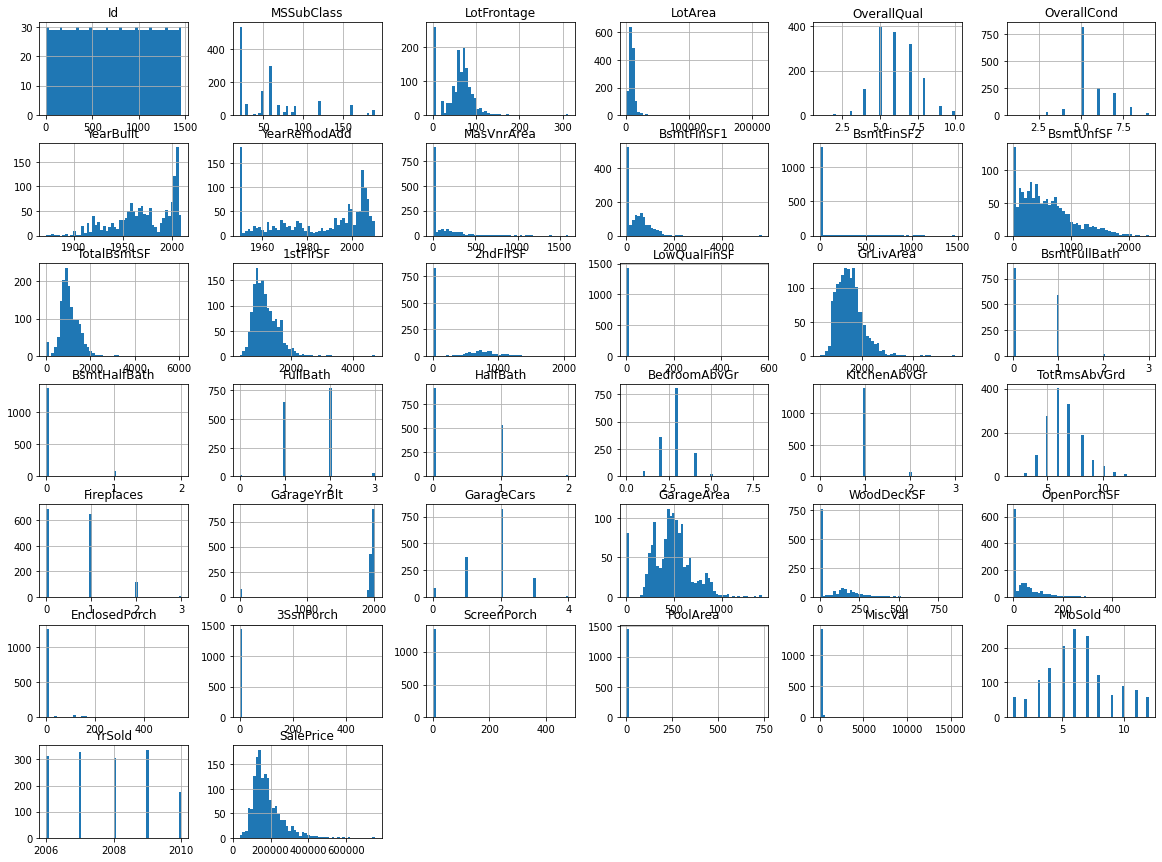

In [348]:
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [349]:
x_train=train_data.iloc[:,:-2]
x_train=x_train.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))
y_train=train_data.iloc[:,-1]
x_test=test_data.iloc[:,:-1]
x_test=x_test.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))


In [350]:
x_train,y_train,x_test

(        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
 0        0           0         0            0        0       0      0   
 1        1           1         0            1        1       0      0   
 2        2           0         0            2        2       0      0   
 3        3           2         0            3        3       0      0   
 4        4           0         0            4        4       0      0   
 ...    ...         ...       ...          ...      ...     ...    ...   
 1455  1455           0         0           57      244       0      0   
 1456  1456           1         0            5     1071       0      0   
 1457  1457           2         0           13      302       0      0   
 1458  1458           1         0            2     1072       0      0   
 1459  1459           1         0            6      553       0      0   
 
       LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
 0            0            0   

In [351]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
model=reg.fit(x_train,y_train)

In [352]:
pred=model.predict(x_test)

In [353]:
print(pred)

[211791.11 203018.45 231010.9  ... 225049.53 119891.33 189802.93]
